In [1]:
import numpy as np

In [2]:
x = np.arange(1,101)

In [3]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [11]:
# Sample the array using the np.random.choice() function
sample = np.random.choice(x, size=10)

In [12]:
sample

array([65,  9, 10, 68, 32, 64, 76, 73,  6, 64])

In [13]:
import matplotlib.pyplot as plt

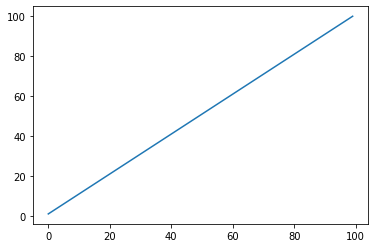

In [14]:
plt.plot(x)

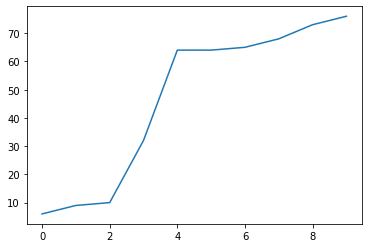

In [15]:
sample.sort()
plt.plot(sample)

In [16]:
# Generate random samples from a normal distribution
samples = np.random.normal(0, 1, size=1000)

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

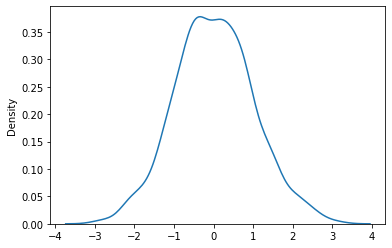

In [21]:
sns.kdeplot(x=samples)

In [22]:
samples.mean()

0.02553514592400442

In [24]:
samples[:100]

array([ 0.67844429,  1.29645761, -0.75271964,  0.41773583, -0.69600343,
       -2.98690303, -0.27313769, -1.24989186,  0.57549238,  1.37049439,
        0.64039992,  0.64843715, -1.4168268 , -0.50284744, -0.33669778,
       -1.16234286, -0.18354391, -0.03712425,  0.87118253,  0.84055333,
        0.11510841, -1.09337722,  1.898671  ,  2.96405979,  1.67308679,
        1.53610705,  1.59109498,  2.3895192 ,  0.38618017,  0.17010719,
       -2.27405676,  1.53860823, -0.98845384, -0.87204115,  0.40751686,
        0.43056308,  0.37413811, -0.24893263,  0.05669431,  0.52900116,
        0.89215847, -1.22261869, -0.68670863, -0.40830123, -0.48179751,
        0.76575853,  0.82628381, -1.2912809 , -0.41636503,  1.99326982,
        1.15477735, -0.26073641,  0.91525188,  0.40774457,  1.48349026,
        0.01901179,  0.03210802, -0.7757216 , -0.22388759,  0.10638588,
       -0.27456456, -0.47469037,  0.06491198,  0.87921311, -1.76685292,
       -2.03561606, -0.31342949, -0.42044798,  0.37098201,  0.10

<AxesSubplot:ylabel='Density'>

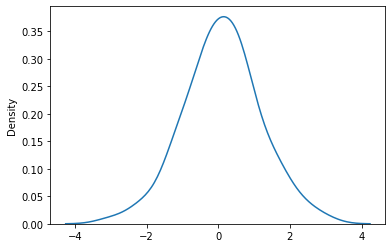

In [25]:
sns.kdeplot(samples[:100])

In [26]:
samples[:100].mean()

0.107198850844287

#### Stratified Sampling

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('loan-prediction.csv')

In [30]:
df.shape

(614, 13)

In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [34]:
df['Loan_Status'].value_counts()/len(df)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
train, test = train_test_split(df,random_state=0, test_size=0.25)

In [41]:
train['Loan_Status'].value_counts()/len(train)*100

Y    67.608696
N    32.391304
Name: Loan_Status, dtype: float64

In [42]:
test['Loan_Status'].value_counts()/len(test)*100

Y    72.077922
N    27.922078
Name: Loan_Status, dtype: float64

In [43]:
train, test = train_test_split(
    df,random_state=0, test_size=0.25, stratify=df['Loan_Status'])

In [44]:
train['Loan_Status'].value_counts()/len(train)*100

Y    68.695652
N    31.304348
Name: Loan_Status, dtype: float64

In [45]:
test['Loan_Status'].value_counts()/len(test)*100

Y    68.831169
N    31.168831
Name: Loan_Status, dtype: float64

In [46]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [48]:
# Undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
rus = RandomUnderSampler(random_state=0)

In [51]:
x, y = rus.fit_resample(df, df['Loan_Status'])

In [52]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
2,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
3,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
4,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
380,LP002036,Male,Yes,0,Graduate,No,2058,2134.0,88.0,360.0,NaN,Urban,Y
381,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
382,LP002190,Male,Yes,1,Graduate,No,6325,0.0,175.0,360.0,1.0,Semiurban,Y


In [53]:
x['Loan_Status'].value_counts()

N    192
Y    192
Name: Loan_Status, dtype: int64

In [54]:
# Over-sampling
from imblearn.over_sampling import RandomOverSampler

In [55]:
ros = RandomOverSampler(random_state=0)

In [57]:
x, y = ros.fit_resample(df, df['Loan_Status'])

In [58]:
x['Loan_Status'].value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [59]:
x.shape

(844, 13)

#### Estimation

In [61]:
x = np.arange(1,1001)

In [63]:
x.shape

(1000,)

In [64]:
y = np.random.choice(x, size=20)

In [65]:
y.shape

(20,)

In [66]:
y

array([263, 783, 627, 992,  90, 571, 750, 596, 122, 918, 947, 243, 648,
       767, 666, 210,  81, 394, 327, 447])

In [67]:
y.mean()

522.1

In [68]:
x.mean()

500.5

In [69]:
np.median(y)

583.5

In [70]:
np.median(x)

500.5

In [71]:
y.std()

286.1284501757908

In [72]:
x.std()

288.6749902572095

#### Central Limit Theorem

In [81]:
# Generate random samples from a normal distribution
samples = np.random.normal(0, 1, size=1000)

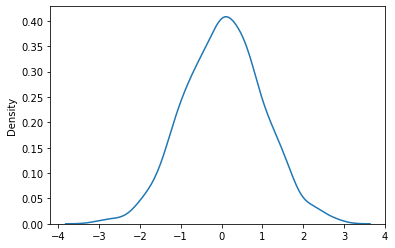

In [82]:
sns.kdeplot(samples);

In [84]:
s1 = samples[:5]
s2 = samples[:10]
s3 = samples[:20]
s4 = samples[:30]
s5 = samples[:50]
s6 = samples[:100]

<AxesSubplot:ylabel='Density'>

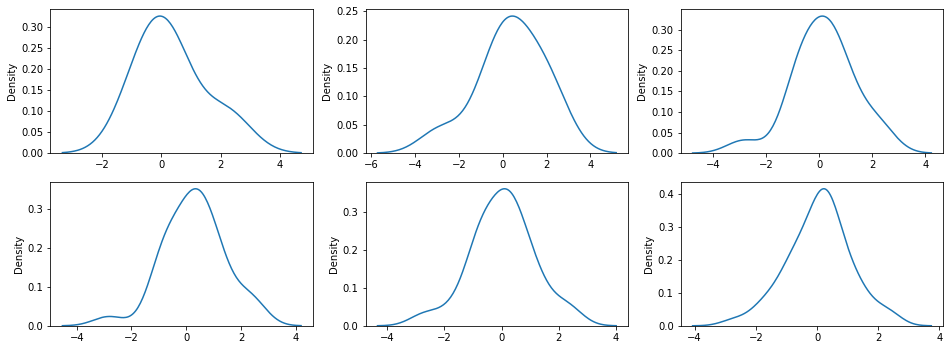

In [88]:
plt.figure(figsize=(16,9))
plt.subplot(3,3,1)
sns.kdeplot(s1)
plt.subplot(3,3,2)
sns.kdeplot(s2)
plt.subplot(3,3,3)
sns.kdeplot(s3)
plt.subplot(3,3,4)
sns.kdeplot(s4)
plt.subplot(3,3,5)
sns.kdeplot(s5)
plt.subplot(3,3,6)
sns.kdeplot(s6)

In [114]:
dice = np.zeros(1000)
for i in range(1000):
    dice[i]=(np.random.randint(1,7))

In [115]:
dice.shape

(1000,)

In [116]:
s1 = dice[:5]
s2 = dice[:10]
s3 = dice[:20]
s4 = dice[:30]
s5 = dice[:50]
s6 = dice[:100]

<AxesSubplot:ylabel='Density'>

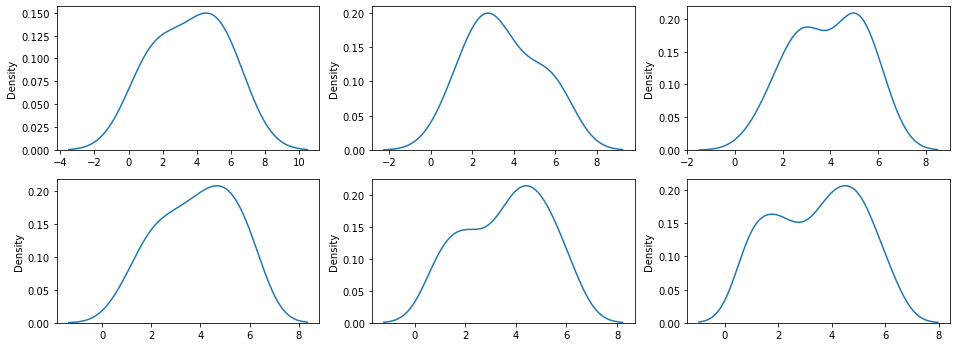

In [117]:
plt.figure(figsize=(16,9))
plt.subplot(3,3,1)
sns.kdeplot(s1)
plt.subplot(3,3,2)
sns.kdeplot(s2)
plt.subplot(3,3,3)
sns.kdeplot(s3)
plt.subplot(3,3,4)
sns.kdeplot(s4)
plt.subplot(3,3,5)
sns.kdeplot(s5)
plt.subplot(3,3,6)
sns.kdeplot(s6)

In [118]:
dice.mean()

3.42

In [119]:
s1.mean()

3.6

In [120]:
s2.mean()

3.5

In [121]:
s3.mean()

3.9

In [122]:
s4.mean()

3.8666666666666667

In [123]:
s5.mean()

3.6

In [124]:
s1.std(), s2.std(), s3.std(), s4.std(), s5.std()

(1.8547236990991407,
 1.6278820596099706,
 1.4798648586948742,
 1.521694961401777,
 1.6)